In [1]:
# import the libraries 
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
X=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [8]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [11]:
#model building
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [13]:
confusion_matrix(y_test,y_pred)

array([[ 65,  40],
       [ 18, 145]], dtype=int64)

In [14]:
accuracy_score(y_test,y_pred)

0.7835820895522388

In [15]:
from sklearn.metrics import precision_score,recall_score
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('precesion:',prec)
print('recall:' , recall)

precesion: 0.7837837837837838
recall: 0.8895705521472392


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       105
           1       0.78      0.89      0.83       163

    accuracy                           0.78       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268



In [17]:
from sklearn.metrics import roc_auc_score

In [18]:
log_roc_auc_score=roc_auc_score(y_test,y_pred)
print('Area under curve:',log_roc_auc_score)

Area under curve: 0.7543090855974292


In [19]:
log.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1], dtype=int64)

In [20]:
# .predict_probability returns the probability values for class 0 and class 1
proba=log.predict_proba(x_test)[:,-1]
np.where(proba>=0.5,1,0)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1])

In [21]:
proba=log.predict_proba(x_test)
print(proba)

[[3.72971928e-01 6.27028072e-01]
 [2.08253542e-01 7.91746458e-01]
 [1.60013680e-01 8.39986320e-01]
 [5.64185372e-03 9.94358146e-01]
 [9.30897596e-01 6.91024035e-02]
 [2.86671766e-01 7.13328234e-01]
 [1.24879819e-01 8.75120181e-01]
 [8.03417814e-01 1.96582186e-01]
 [4.18313212e-01 5.81686788e-01]
 [9.12943574e-01 8.70564255e-02]
 [4.95408851e-01 5.04591149e-01]
 [2.42588934e-01 7.57411066e-01]
 [5.50097131e-01 4.49902869e-01]
 [3.12415521e-02 9.68758448e-01]
 [1.23189742e-01 8.76810258e-01]
 [4.75980190e-02 9.52401981e-01]
 [9.05692939e-01 9.43070607e-02]
 [9.40470219e-01 5.95297812e-02]
 [1.62661039e-01 8.37338961e-01]
 [6.60546571e-02 9.33945343e-01]
 [5.18885849e-02 9.48111415e-01]
 [1.71600867e-01 8.28399133e-01]
 [4.30493973e-01 5.69506027e-01]
 [3.85881181e-01 6.14118819e-01]
 [2.85518043e-01 7.14481957e-01]
 [6.16315892e-02 9.38368411e-01]
 [2.25865154e-01 7.74134846e-01]
 [7.95477658e-03 9.92045223e-01]
 [1.61848838e-02 9.83815116e-01]
 [5.66150497e-01 4.33849503e-01]
 [4.594671

In [22]:
proba=log.predict_proba(x_test)[:,-1]

In [23]:
threshold=[0.5,0.4,0.3,0.2,0.1]
tprs=[]
fprs=[]
for i in threshold:
    y_pred=np.where(proba>=i,1,0)
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
    fpr=fp/(tn+fp)
    tpr=tp/(fn+tp)
    tprs.append(tpr)
    fprs.append(fpr)

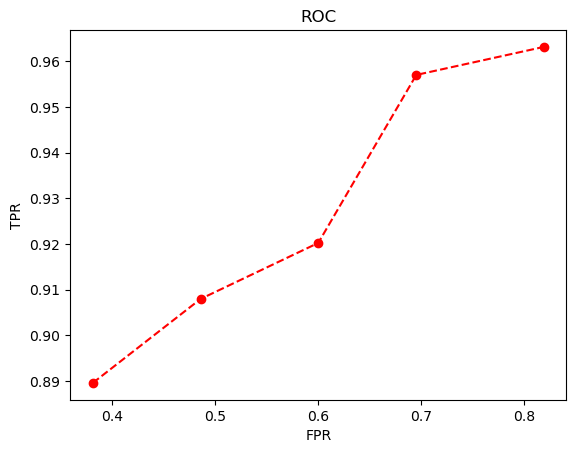

In [24]:
plt.figure()
plt.plot(fprs,tprs,'o--r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [25]:
# here FPR increases TPR also increases 
# here suppose we want a model which gives good recall
# here we have to change the threshold value
# but we can observe the threshold=0.2 is giving the best values for tpr and fpr
# so we can take threshold=0.2 for model

In [26]:
y_pred=np.where(proba>=0.2,1,0)
recall_score=(y_test,y_pred)

In [27]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
print(fpr,tpr,threshold)

[0.        0.6952381 1.       ] [0.         0.95705521 1.        ] [2 1 0]


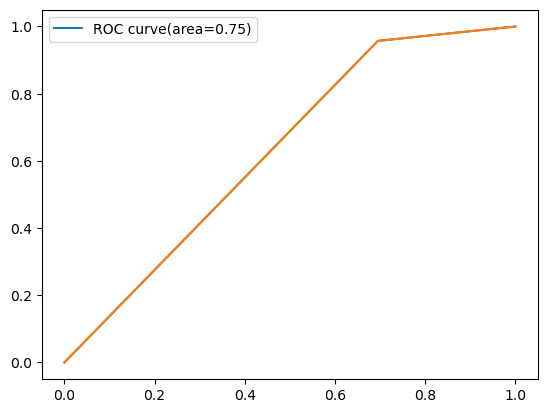

In [28]:
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%log_roc_auc_score)
plt.plot(fpr,tpr)
plt.legend()
plt.show()